### Importación de datos



In [1]:
import pandas as pd
from matplotlib import pyplot as plt

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [2]:
GananciasTienda = tienda["Precio"].sum()
print("Ingresos de la tienda 1: " , GananciasTienda)
GananciasTienda2 = tienda2["Precio"].sum()
print("Ingresos de la tienda 2: " , GananciasTienda2)
GananciasTienda3 = tienda3["Precio"].sum()
print("Ingresos de la tienda 3: " , GananciasTienda3)
GananciasTienda4 = tienda4["Precio"].sum()
print("Ingresos de la tienda 4: " , GananciasTienda4)


Ingresos de la tienda 1:  1150880400.0
Ingresos de la tienda 2:  1116343500.0
Ingresos de la tienda 3:  1098019600.0
Ingresos de la tienda 4:  1038375700.0


# 2. Ventas por categoría

In [4]:
def contador(nTienda, impresor = True):
    dicVentas = {x: 0 for x in nTienda["Categoría del Producto"]} #dicVentas = diccionario con las categorias
    for nObjeto in range(len(nTienda["Precio"])): #nObjeto = posicion
        dicVentas[nTienda["Categoría del Producto"][nObjeto]] += 1 #Para calcular ganancias, cambiar 1 por nTienda["Precio"][nObjeto]
    if impresor:
        for categoria in dicVentas:
            print("Ventas de", categoria, "=", float(dicVentas[categoria]))
    else:
        return dicVentas

contador(tienda)


Ventas de Electrónicos = 448.0
Ventas de Muebles = 465.0
Ventas de Juguetes = 324.0
Ventas de Electrodomésticos = 312.0
Ventas de Artículos para el hogar = 171.0
Ventas de Deportes y diversión = 284.0
Ventas de Libros = 173.0
Ventas de Instrumentos musicales = 182.0


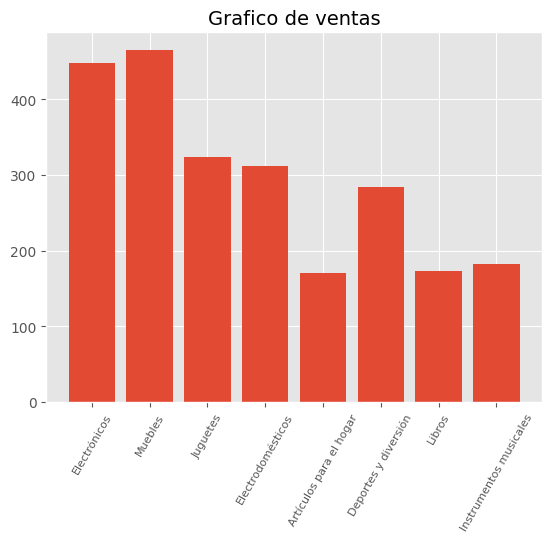

In [47]:
def graficoDeVentas(dicVentas):
    nombreProductos =[]
    ventasProductos =[]
    for producto in dicVentas:
        nombreProductos.append(producto)
        ventasProductos.append(dicVentas[producto])
    plt.bar(x = nombreProductos, height= ventasProductos)
    plt.xticks(rotation=60, fontsize = 8)
    plt.title("Grafico de ventas", fontsize = 14)
    plt.show()

graficoDeVentas(contador(tienda, False))

# 3. Calificación promedio de la tienda


In [70]:
promedio = lambda x: float(x.sum()/len(x))
listaTiendas = [tienda, tienda2, tienda3, tienda4]
i = 0
for nTienda in listaTiendas:
    i+=1
    print("Calificacion promedio de la tienda ", i, ": ",promedio(nTienda["Calificación"]))

Calificacion promedio de la tienda  1 :  3.976685036032217
Calificacion promedio de la tienda  2 :  4.037303942348453
Calificacion promedio de la tienda  3 :  4.048325561678677
Calificacion promedio de la tienda  4 :  3.9957591178965224


# 4. Productos más y menos vendidos

In [34]:
def calificadorVentas(nTienda):
    dicVentas = contador(nTienda, False)
    masVendido = 0
    menosVendido = 0
    for producto in dicVentas:
        if masVendido == 0 or dicVentas[producto] > dicVentas[masVendido]:
            masVendido = producto
        else:
            menosVendido = producto

    print(masVendido, "es el producto mas vendido de la tienda, con", dicVentas[masVendido], "ventas.")
    print(menosVendido, "es el producto menos vendido de la tienda, con", dicVentas[menosVendido], "ventas.")


calificadorVentas(tienda)




Muebles es el producto mas vendido de la tienda, con 465 ventas.
Instrumentos musicales es el producto menos vendido de la tienda, con 182 ventas.


# 5. Envío promedio por tienda

In [69]:
i=0
for nTienda in listaTiendas:
    i+=1
    print("Promedio de envio de la tienda", i ,":",promedio(nTienda["Costo de envío"]))


Promedio de envio de la tienda 1 : 26018.60958033065
Promedio de envio de la tienda 2 : 25216.235693090293
Promedio de envio de la tienda 3 : 24805.680373039424
Promedio de envio de la tienda 4 : 23459.457167090754


In [ ]:

enviosPromedio = [promedio(x["Costo de envío"]) for x in listaTiendas]
print(enviosPromedio)

[26018.60958033065, 25216.235693090293, 24805.680373039424, 23459.457167090754]
